> Apply Naive Bayes to predict if an email is spam based on the input of sample email

In [1]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/spam.csv', encoding='latin-1')
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   str  
 1   v2          5572 non-null   str  
 2   Unnamed: 2  50 non-null     str  
 3   Unnamed: 3  12 non-null     str  
 4   Unnamed: 4  6 non-null      str  
dtypes: str(5)
memory usage: 217.8 KB


In [3]:
data['v1'].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: str

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
source = data['v2']
type(source)

pandas.Series

In [6]:
source[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: str

In [7]:
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [8]:
target = data['v1']
type(target)

pandas.Series

In [9]:
target = target.replace('ham', 0)
target = target.replace('spam', 1)

In [10]:
target.head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: object

In [11]:
text_data = np.array(source)
text_data

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], shape=(5572,), dtype=object)

In [12]:
count = CountVectorizer()
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [13]:
X = bag_of_words.toarray()
print(X.shape)
X

(5572, 8672)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 8672))

In [14]:
y = np.array(target)
print(y.shape)
y = y.astype(int)
y

(5572,)


array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train

array([0, 1, 0, ..., 0, 0, 0], shape=(4457,))

In [17]:
clf = MultinomialNB()
model = clf.fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print('score Scikit learn - train:', model.score(X_train, y_train))

score Scikit learn - train: 0.9943908458604442


In [20]:
print("Accuracy is ", accuracy_score(y_test, y_pred)*100,'%')

Accuracy is  97.847533632287 %


In [21]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[952,  13],
       [ 11, 139]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [23]:
y_prob = model.predict_proba(X_test)
y_prob

array([[1.32325954e-01, 8.67674046e-01],
       [1.00000000e+00, 4.20758364e-11],
       [6.01285769e-04, 9.99398714e-01],
       ...,
       [9.99999513e-01, 4.86783149e-07],
       [9.92818235e-01, 7.18176517e-03],
       [6.72992297e-10, 9.99999999e-01]], shape=(1115, 2))

In [24]:
roc_auc_score(y_test, y_prob[:,1])

0.9792158894645941

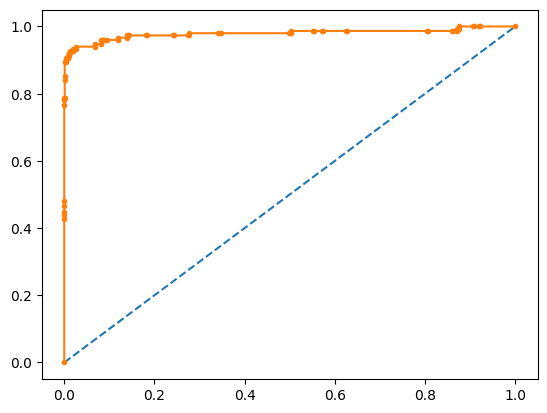

In [25]:
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [26]:
import pickle
pkl_filename = 'exercise_4__spam_ham_prediction__predict_model.pkl'
with open(pkl_filename,'wb') as file:
    pickle.dump(model,file)

In [27]:
pkl_count = 'exercise_4__spam_ham_prediction__count_model.pkl'
with open(pkl_count,'wb') as file:
    pickle.dump(count, file)

In [28]:
with open(pkl_filename,'rb') as file:
    ham_spam_model = pickle.load(file)

with open(pkl_count,'rb') as file:
    count_model = pickle.load(file)

In [29]:
x_new = np.array(['We have a promotion flash sale available only today. Discount up to 50%'
                , "Don't forget to buy groceries in the nearby supermarket!"
                , "There's a flash sale in the supermarket near my house. Do you want to come by?"
                , "Let's buy a shoes with up to 100% discount!"])
x_new = count_model.transform(x_new)

In [30]:
y_pred_new = ham_spam_model.predict(x_new)
print(y_pred_new)

[1 0 0 1]
